# Lab | Customer Analysis Round 3 (base file: Data Aggregation and Filtering file)

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# The line down below is needed to prevent matplotlib to open the graph in a seaparate popup window. 
%matplotlib inline

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv')

In [4]:
data

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

In [95]:
#step 1 create new data frame
data_filtered=data[(data['Response']=='Yes') & (data['Total Claim Amount']>1000)]
disp

2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

In [99]:
#step 2 create filtered dataframe 
data_filtered_2=data[(data['Response']=='Yes')]
data_filtered_2=data[['Policy Type','Gender','Total Claim Amount']] 
data_filtered_2

,Policy Type,Gender,Total Claim Amount
0,Corporate Auto,M,292.800000
1,Personal Auto,F,744.924331
2,Personal Auto,M,480.000000
3,Corporate Auto,M,484.013411
4,Personal Auto,F,707.925645
...,...,...,...
10905,Personal Auto,F,1214.400000
10906,Personal Auto,F,273.018929
10907,Corporate Auto,F,381.306996
10908,Personal Auto,F,618.288849


In [114]:
#step 3 create aggregation, reset index,and round(2)
                
data_filtered_2_summary=data_filtered_2.groupby(['Gender','Policy Type']).agg({'Total Claim Amount': 'mean'})
data_filtered_2_summary=data_filtered_2_summary.reset_index().round(2)
data_filtered_2_summary=data_filtered_2_summary.rename(columns={"Total Claim Amount": "Mean Claim Amount"})
data_filtered_2_summary

,Gender,Policy Type,Mean Claim Amount
0,F,Corporate Auto,397.80
1,F,Personal Auto,413.24
2,F,Special Auto,458.14
3,M,Corporate Auto,462.22
4,M,Personal Auto,459.92
5,M,Special Auto,420.36


3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

In [117]:
#step 1 filter out customers with no policies
data_filtered_3=data[(data['Number of Policies'] > 0)]

In [123]:
#step 2 group by customer and state, filter out states with less than 500 customers
data_filtered_4=data.groupby(['State']).agg({'Customer': 'count'})
data_filtered_4=data_filtered_4[(data_filtered_4['Customer'] > 500)]
data_filtered_4.sort_values(by='Customer', ascending=False)

,Customer
State,
California,3552
Oregon,2909
Arizona,1937
Nevada,993
Washington,888


4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [125]:
#create filtered dataframe and group by:
data_filtered_clv=data[['Gender','Education','Customer Lifetime Value']]
data_filtered_clv=data_filtered_clv.groupby(['Gender','Education']).agg({'Customer Lifetime Value': ['max', 'min', 'median','mean','count']})

data_filtered_clv.round(0)

Customer Lifetime Value                          \
                                                max     min  median    mean   
Gender Education                                                              
F      Bachelor                             73226.0  1904.0  5641.0  7874.0   
       College                              61850.0  1899.0  5624.0  7749.0   
       Doctor                               44856.0  2396.0  5332.0  7329.0   
       High School or Below                 55277.0  2145.0  6040.0  8675.0   
       Master                               51016.0  2418.0  5730.0  8157.0   
M      Bachelor                             67907.0  1898.0  5548.0  7704.0   
       College                              61135.0  1918.0  6006.0  8052.0   
       Doctor                               32677.0  2268.0  5578.0  7415.0   
       High School or Below                 83325.0  1941.0  6287.0  8150.0   
       Master                               50568.0  2272.0  5579.0  8169.0   

                                   
                            count  
Gender Education                   
F      Bachelor              1700  
       College               1608  
       Doctor                 200  
       High School or Below  1590  
       Master                 475  
M      Bachelor              1572  
       College               1596  
       Doctor                 201  
       High School or Below  1556  
       Master                 412

#conclusions 
the highest median of the groups belongs to gender M; Highschool or below (6287),as well as the highest maximum value (83325), followed by gender F with the same Education category (6040)
it is observecd that the data is rightly skewed across all categories as the mean is in each instance significantly higher than the median (30% higher in the case of all gender F).
The lowest median is observed in the gender G, Doctor group.


## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

In [192]:
#step 1 extract month from effective to date column assuming this is the month.
data_month=data.copy()
data_month['Month'] = data['Effective To Date'].str.split('/', n=2, expand=False).str[0]

In [193]:
#step 2: aggregate  step & month
data_month_state=data_month.groupby(['State','Month']).agg({'Number of Policies': 'sum'})
data_month_state.reset_index()

,State,Month,Number of Policies
0,Arizona,1,3052
1,Arizona,2,2864
2,California,1,5673
3,California,2,4929
4,Nevada,1,1493
5,Nevada,2,1278
6,Oregon,1,4697
7,Oregon,2,3969
8,Washington,1,1358
9,Washington,2,1225


In [200]:
#step 3 column renaming:
data_month_state.columns=['Number of Policies']
data_month_state=data_month_state.reset_index()
data_month_state.columns=['State','Month','Number of Policies']


In [203]:
#step 3: pivoting
data_month_state_pi=data_month_state.pivot(index='State', columns='Month',values='Number of Policies')
display(data_month_state_pi)


Month,1,2
State,,
Arizona,3052,2864
California,5673,4929
Nevada,1493,1278
Oregon,4697,3969
Washington,1358,1225


6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

In [144]:
#step 1 create data
data_top_state=data_month.groupby(['State']).agg({'Number of Policies': 'sum'})

data_top_state

,Number of Policies
State,
Arizona,5916
California,10602
Nevada,2771
Oregon,8666
Washington,2583


In [147]:
#step 2 sort and select top 3
data_top_state.sort_values(by='Number of Policies', ascending=False).head(3)

,Number of Policies
State,
California,10602
Oregon,8666
Arizona,5916


7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

In [177]:
#step 3 grouping
data_7=data.groupby(['Sales Channel', 'Response' ]).agg({'Response': 'count'})
data_7

Response
Sales Channel Response          
Agent         No            3148
              Yes            742
Branch        No            2539
              Yes            326
Call Center   No            1792
              Yes            221
Web           No            1334
              Yes            177

In [180]:
#step 4 column renaming...
data_7.columns = ['Count of Responses']
data_7

Count of Responses
Sales Channel Response                    
Agent         No                      3148
              Yes                      742
Branch        No                      2539
              Yes                      326
Call Center   No                      1792
              Yes                      221
Web           No                      1334
              Yes                      177

In [182]:
#step 4 continued for column renaming...
data_7=data_7.reset_index()

In [186]:
#step 4 continued last column renaming...
data_7.columns=['Sales Channel','Response','Count of Response']
data_7

,Sales Channel,Response,Count of Response
0,Agent,No,3148
1,Agent,Yes,742
2,Branch,No,2539
3,Branch,Yes,326
4,Call Center,No,1792
5,Call Center,Yes,221
6,Web,No,1334
7,Web,Yes,177


In [190]:
#step 5
data_8=data_7.pivot(index='Response', columns='Sales Channel',values='Count of Response')
data_8

Sales Channel,Agent,Branch,Call Center,Web
Response,,,,
No,3148,2539,1792,1334
Yes,742,326,221,177


External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [ ]:
# your code goes here

______ROUND 3 LAB__________

Use the same jupyter file from the last lab, Customer Analysis Round 3

EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

Show DataFrame info.
Describe DataFrame.
Show a plot of the total number of responses.
Show a plot of the response rate by the sales channel.
Show a plot of the response rate by the total claim amount.
Show a plot of the response rate by income.

In [ ]:
#1 Show DataFrame info.

data.info()

In [ ]:
#2 Describe DataFrame.

data.describe()

In [29]:
Response_count=data['Response'].value_counts()
Response_count

Response
No     8813
Yes    1466
Name: count, dtype: int64

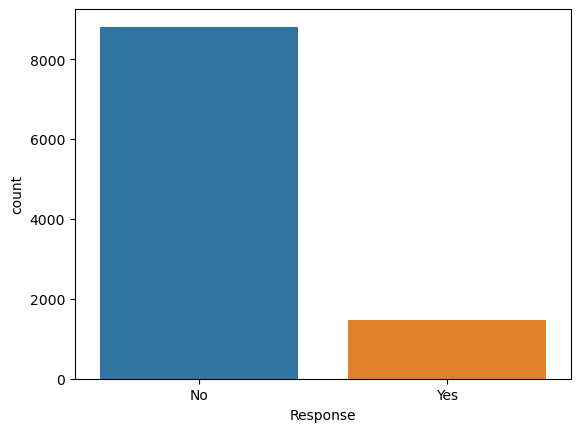

In [45]:
#3 Show a plot of the total number of responses.
fig, ax = plt.subplots(1)
sns.countplot(data=data, x="Response")
plt.show()

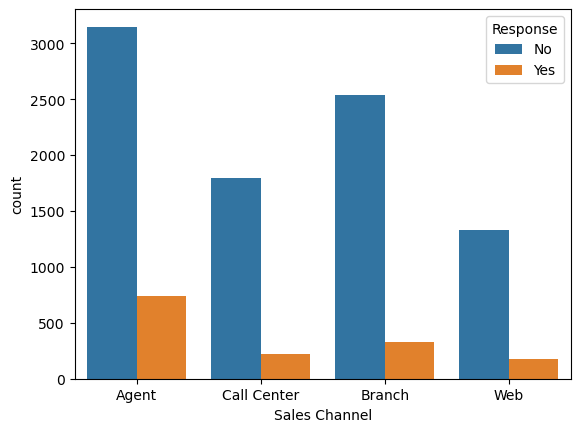

In [53]:
#4 Show a plot of the response rate by the sales channel.
fig, ax = plt.subplots()
sns.countplot(data=data, x="Sales Channel", hue='Response', ax = ax)
plt.show()

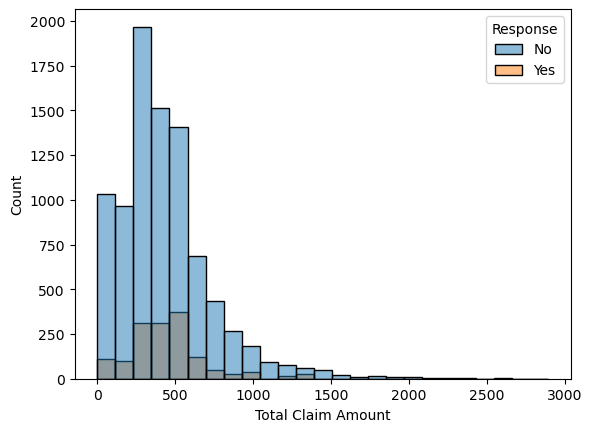

In [72]:
#5 Show a plot of the response rate by the total claim amount. Histogram
fig, ax = plt.subplots()
sns.histplot(data=data, x = "Total Claim Amount", hue='Response', bins=25, ax=ax)
plt.show()

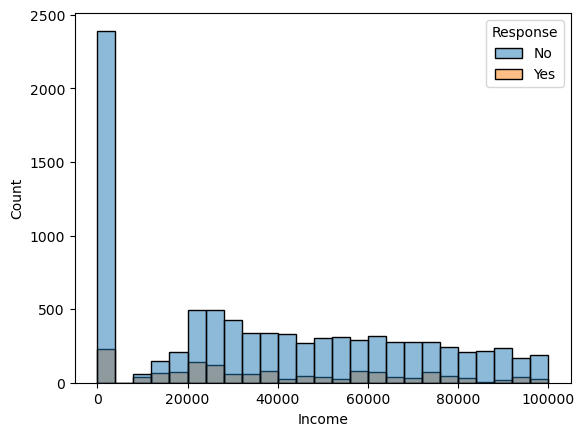

In [75]:
#6 Show a plot of the response rate by income. Histogram
fig, ax = plt.subplots()
sns.histplot(data=data, x = "Income", hue='Response', bins=25, ax=ax)
plt.show()